## Exercises (DIY) - Part 1

Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Step 1: Load the CSV and Excel files
passengerData.csv has info about the passengers, ticketPrices.xlsx has the price lookup

In [2]:
passenger_data = pd.read_csv('passengerData.csv')
ticket_prices = pd.read_excel('ticketPrices.xlsx')

Step 2: Merge the two dataframes using 'TicketType' as the common column
This allows us to combine the passenger info with the ticket prices

In [3]:
merged_data = pd.merge(passenger_data, ticket_prices, on='TicketType')

Step 3: Find the oldest passengers
We're grabbing the rows where the 'Age' column matches the max age in the dataset

In [16]:
oldest_passengers = merged_data[merged_data['Age'] == merged_data['Age'].max()][['Name', 'Age']]
print("Oldest Passengers:")
print(oldest_passengers)

Oldest Passengers:
                                     Name   Age
630  Barkworth, Mr. Algernon Henry Wilson  80.0


Step 4: Scatter plot for Age vs Ticket Prices
Here, we visualize how the ticket prices relate to the passengers' ages

In [6]:
print(merged_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'TicketType',
       'Fare'],
      dtype='object')


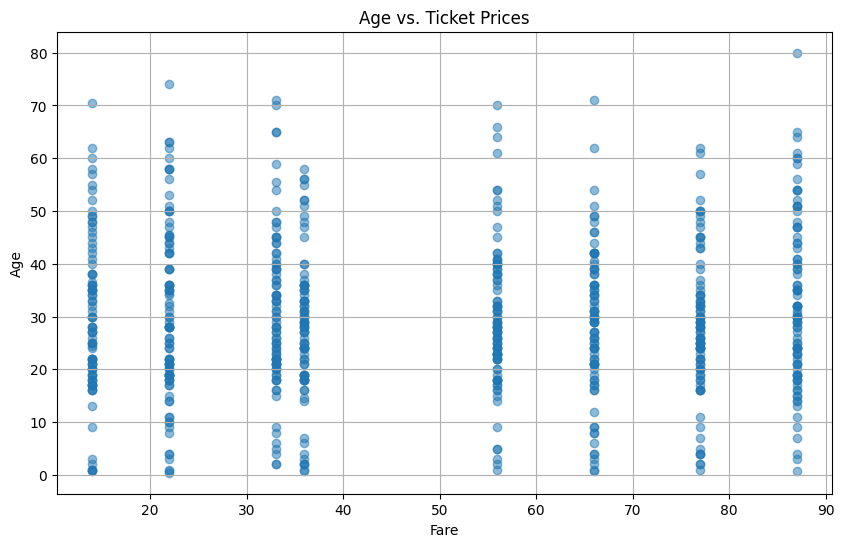

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(merged_data['Fare'], merged_data['Age'], alpha=0.5)
plt.title('Age vs. Ticket Prices')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.grid(True)
plt.show()

Step 5: Filter and plot for female passengers aged 40-50 who paid 40 or more
We're narrowing it down to this specific group for a more focused plot

In [9]:
female_filtered_data = merged_data[(merged_data['Sex'] == 'female') & 
                                   (merged_data['Age'] >= 40) & 
                                   (merged_data['Age'] <= 50) & 
                                   (merged_data['Fare'] >= 40)]

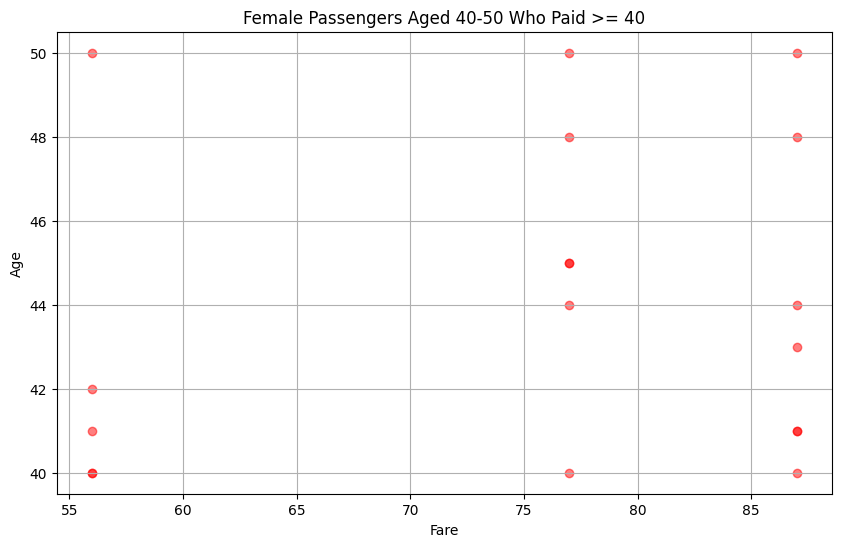

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(female_filtered_data['Fare'], female_filtered_data['Age'], color='red', alpha=0.5)
plt.title('Female Passengers Aged 40-50 Who Paid >= 40')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.grid(True)
plt.show()

## DIY Exercises - 2 : Missing values

### Step 1: Load the Data

We start by loading the modified Titanic dataset into a pandas `DataFrame`.

In [24]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('titanicSurvival_m.csv')

# Display the first few rows to understand the structure
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Count Missing Values in Each Column

Now, I'm going to count the missing values in each column to see where the data might need cleaning.

In [25]:
# Count the missing values in each column
missing_values = titanic_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            46
Cabin          687
Embarked         2
dtype: int64


### Step 3: Compute Descriptive Statistics

Next, we'll calculate the mean and other descriptive statistics for the dataset.